> **Fatal prediction using KNN Classifier**
>
> **Importing required libraries**  
> import pandas as pd  
> import numpy as np  
> import matplotlib.pyplot as plt  
> from sklearn import svm  
> import seaborn as sns  
> import warnings  
> warnings.filterwarnings('ignore')
>
> **Read the csv file**  
> df=pd.read_csv("train.csv")  
> df.head()
>
> m.. accelerations fetal_movement uterine_contractions \\ 0 142 0.000
> 0.000 0.007 1 122 0.000 0.000 0.006 2 129 0.005 0.003 0.001 3 136
> 0.006 0.000 0.008 4 144 0.000 0.000 0.006
>
> light_decelerations severe_decelerations prolongued_decelerations \\  
> 0 0.000 0.0 0.0
>
> 1 0.002 0.0 0.0
>
> 2 0.000 0.0 0.0
>
> 3 0.000 0.0 0.0
>
> 4 0.000 0.0 0.0
>
> abnormal_short_term_variability mean_value_of_short_term_variability
> \\ 0 58  
> 0.4  
> 1 27  
> 1.4  
> 2 34  
> 1.7  
> 3 45  
> 0.8  
> 4 32  
> 1.0
>
> percentage_of_time_with_abnormal_long_term_variability ...
>
> histogram_min \\  
> 0 9 ...
>
> 136  
> 1 4 ...
>
> 91  
> 2 0 ...
>
> 78  
> 3 2 ...
>
> 129  
> 4 0 ...
>
> 122
>
> histogram_max histogram_number_of_peaks histogram_number_of_zeroes
> \\  
> 0 156 0 0  
> 1 144 4 0  
> 2 196 10 0  
> 3 158 2 0  
> 4 160 1 0
>
> histogram_mode histogram_mean histogram_median histogram_variance \\  
> 0 148 147 149 1  
> 1 126 120 122 6  
> 2 137 136 137 6  
> 3 144 143 145 1  
> 4 150 147 149 2
>
> histogram_tendency fetal_health 0 0 1 1 0 1 2 0 1 3 0 1 4 1 1
>
> \[5 rows x 22 columns\]
>
> **Finding the info**  
> df.info()
>
> \<class 'pandas.core.frame.DataFrame'\>  
> RangeIndex: 1700 entries, 0 to 1699  
> Data columns (total 22 columns):  
> \# Column Non-Null Count Dtype  
> --- ------  
> -------------- -----  
> 0 m.. 1700 nonnull int64  
> 1 accelerations 1700 nonnull float64  
> 2 fetal_movement 1700 nonnull float64  
> 3 uterine_contractions 1700 nonnull float64  
> 4 light_decelerations 1700 nonnull float64  
> 5 severe_decelerations 1700 nonnull float64  
> 6 prolongued_decelerations 1700 nonnull float64  
> 7 abnormal_short_term_variability 1700 nonnull int64  
> 8 mean_value_of_short_term_variability 1700 nonnull float64  
> 9 percentage_of_time_with_abnormal_long_term_variability 1700 nonnull
> int64  
> 10 mean_value_of_long_term_variability 1700 nonnull float64  
> 11 histogram_width 1700 nonnull int64  
> 12 histogram_min 1700 nonnull int64  
> 13 histogram_max 1700 nonnull int64  
> 14 histogram_number_of_peaks 1700 nonnull int64  
> 15 histogram_number_of_zeroes 1700 nonnull int64  
> 16 histogram_mode 1700 nonnull int64  
> 17 histogram_mean 1700 nonnull int64  
> 18 histogram_median 1700 nonnull int64  
> 19 histogram_variance 1700 nonnull int64
>
> 20 histogram_tendency 1700 nonnull int64  
> 21 fetal_health 1700 nonnull int64  
> dtypes: float64(8), int64(14)  
> memory usage: 292.3 KB
>
> **check missing value of the data**  
> df.isna().sum()
>
> m.. 0 accelerations 0 fetal_movement 0 uterine_contractions 0
> light_decelerations 0 severe_decelerations 0 prolongued_decelerations
> 0 abnormal_short_term_variability 0
> mean_value_of_short_term_variability 0
> percentage_of_time_with_abnormal_long_term_variability 0
> mean_value_of_long_term_variability 0 histogram_width 0 histogram_min
> 0 histogram_max 0 histogram_number_of_peaks 0
> histogram_number_of_zeroes 0 histogram_mode 0 histogram_mean 0
> histogram_median 0 histogram_variance 0 histogram_tendency 0
> fetal_health 0 dtype: int64
>
> **describe numeric column**  
> df.describe()
>
> m.. accelerations fetal_movement uterine_contractions \\  
> count 1700.000000 1700.000000 1700.000000 1700.000000  
> mean 133.213529 0.003212 0.010211 0.004356  
> std 9.873344 0.003888 0.050124 0.002943  
> min 106.000000 0.000000 0.000000 0.000000  
> 25% 126.000000 0.000000 0.000000 0.002000  
> 50% 133.000000 0.002000 0.000000
>
> 0.004000  
> 75% 140.000000 0.006000 0.003000 0.006000  
> max 159.000000 0.019000 0.481000 0.015000
>
> light_decelerations severe_decelerations prolongued_decelerations \\  
> count 1700.000000 1700.000000 1700.000000  
> mean 0.001899 0.000004 0.000158  
> std 0.002976 0.000059 0.000587  
> min 0.000000 0.000000 0.000000  
> 25% 0.000000 0.000000 0.000000  
> 50% 0.000000 0.000000 0.000000  
> 75% 0.003000 0.000000 0.000000  
> max 0.015000 0.001000 0.005000
>
> abnormal_short_term_variability mean_value_of_short_term_variability
> \\ count 1700.000000 1700.000000  
> mean 46.508824 1.345353  
> std 17.276801 0.898037  
> min 12.000000 0.200000  
> 25% 32.000000 0.700000  
> 50% 48.000000 1.200000  
> 75% 61.000000 1.700000  
> max 87.000000 7.000000
>
> percentage_of_time_with_abnormal_long_term_variability ... \\ count
> 1700.000000 ... mean 9.738235 ... std 18.227303 ... min 0.000000 ...
> 25% 0.000000 ...
>
> 50% 0.000000 ... 75% 11.000000 ... max 91.000000 ...
>
> histogram_min histogram_max histogram_number_of_peaks \\ count
> 1700.000000 1700.000000 1700.000000 mean 93.121176 163.842353 4.088824
> std 29.520766 17.651851 2.927774 min 50.000000 122.000000 0.000000 25%
> 67.000000 152.000000 2.000000 50% 93.000000 162.000000 4.000000 75%
> 120.000000 174.000000 6.000000 max 159.000000 238.000000 18.000000
>
> histogram_number_of_zeroes histogram_mode histogram_mean \\ count
> 1700.000000 1700.000000 1700.000000 mean 0.324118 137.128235
> 134.461176 std 0.683795 16.608926 15.616890 min 0.000000 60.000000
> 75.000000 25% 0.000000 129.000000 125.000000 50% 0.000000 139.000000
> 135.500000 75% 0.000000 148.000000 145.000000 max 10.000000 187.000000
> 182.000000
>
> histogram_median histogram_variance histogram_tendency fetal_health  
> count 1700.000000 1700.000000 1700.000000 1700.000000  
> mean 137.862941 19.046471 0.324706 1.304706  
> std 14.552801 29.575447 0.608340 0.614788  
> min 77.000000 0.000000 -1.000000 1.000000  
> 25% 128.000000 2.000000 0.000000 1.000000  
> 50% 139.000000 7.000000 0.000000 1.000000  
> 75% 148.000000 24.000000 1.000000 1.000000  
> max 186.000000 269.000000 1.000000 3.000000
>
> \[8 rows x 22 columns\]
>
> **To understand the different types in our target variable
> (fatal_health)** sns.countplot(df.fetal_health)
>
> \<AxesSubplot:xlabel='fetal_health', ylabel='count'\>
>
> 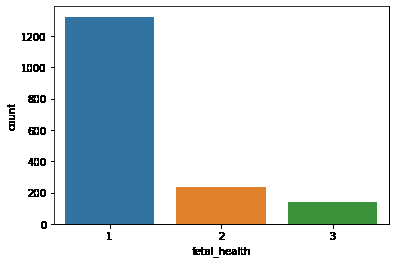
>
> df\['fetal_health'\].value_counts().plot(kind='bar')
>
> \<AxesSubplot:\>
>
> 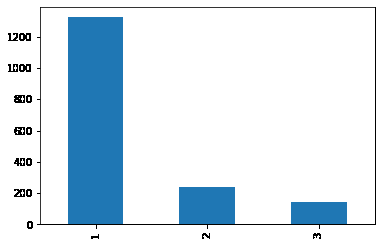
>
> **to find all datatypes in our file**  
> cats = list(df.select_dtypes(include=\['object','bool'\]) ) nums =
> list(df.select_dtypes(include=\['int64','float64'\])) print(cats)  
> print(nums)
>
> \[\]  
> \['m..', 'accelerations', 'fetal_movement', 'uterine_contractions',
> 'light_decelerations', 'severe_decelerations',  
> 'prolongued_decelerations', 'abnormal_short_term_variability',
> 'mean_value_of_short_term_variability',  
> 'percentage_of_time_with_abnormal_long_term_variability',  
> 'mean_value_of_long_term_variability', 'histogram_width',  
> 'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
> 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
> 'histogram_median', 'histogram_variance', 'histogram_tendency',
> 'fetal_health'\]
>
> **splitting the dataset X,y**  
> X=df.iloc\[:,:-1\].values  
> y=df.iloc\[:,-1\].values
>
> from sklearn.model_selection import train_test_split  
> X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,rando
> m_state=21)
>
> **Finding the correlation of df**  
> corr=df.corr()  
> plt.figure(figsize=(20,20))  
> sns.heatmap(corr,annot=True)
>
> \<AxesSubplot:\>
>
> 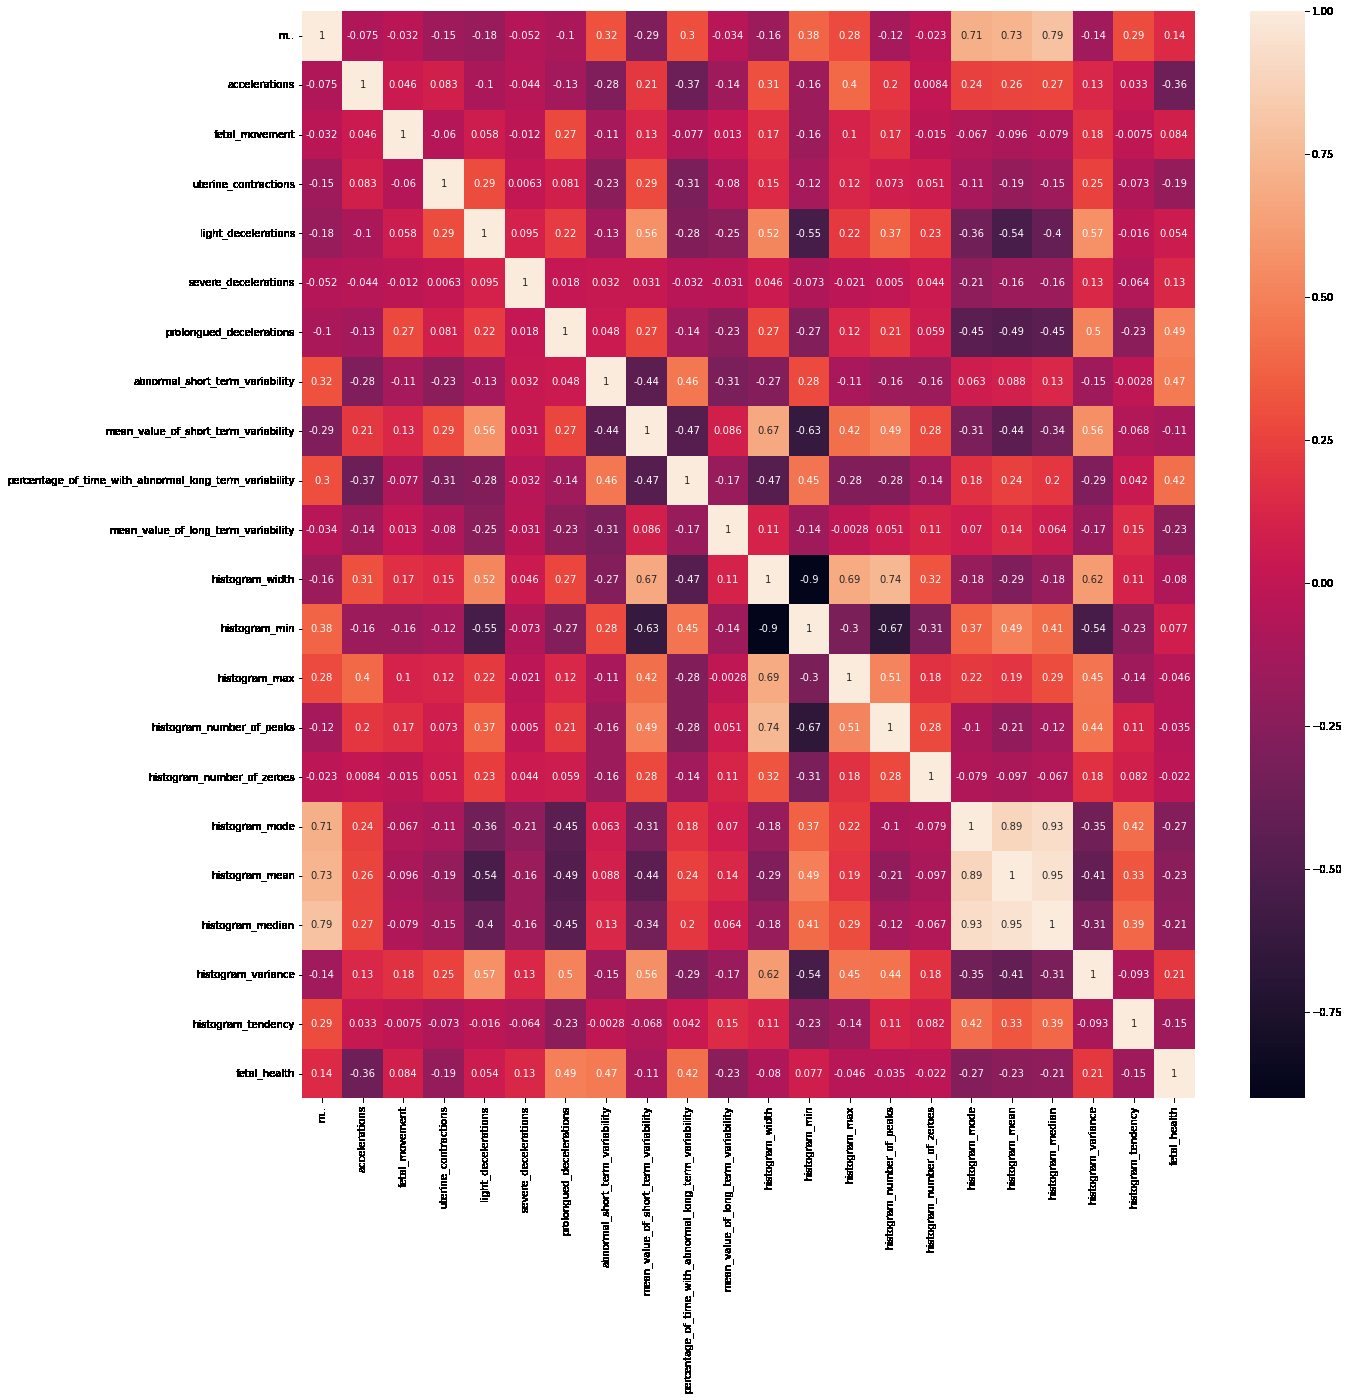
>
> **Finding the outlier using boxplot**  
> **for** i **in** range(0, len(nums )):  
> sns.boxplot(y=df\[nums\[i\]\],color='green',orient='v') plt.show()
>
> 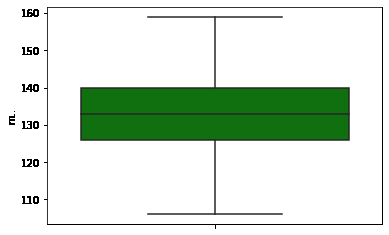
>
> 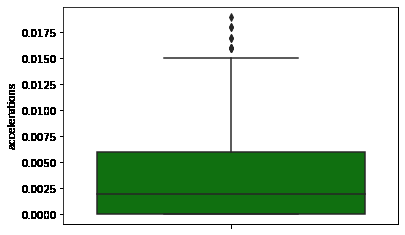
>
> 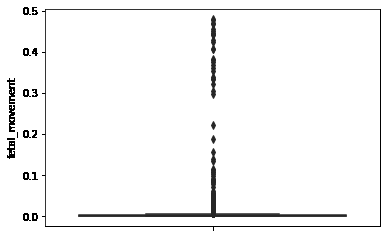
>
> 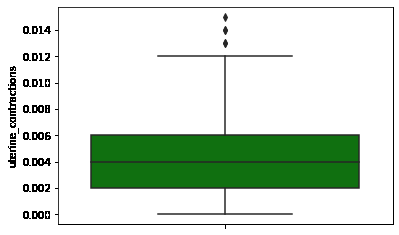
>
> 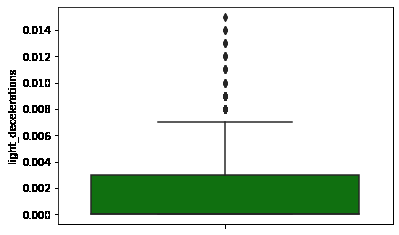
>
> 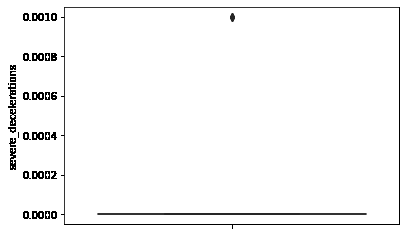
>
> 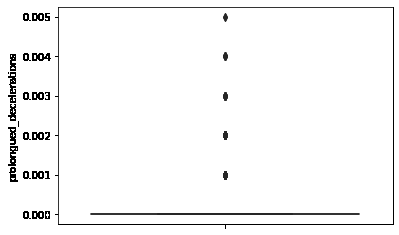
>
> 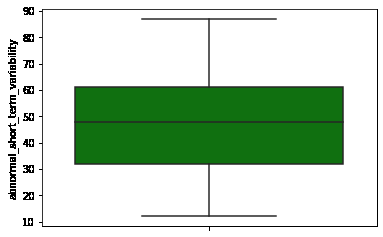
>
> 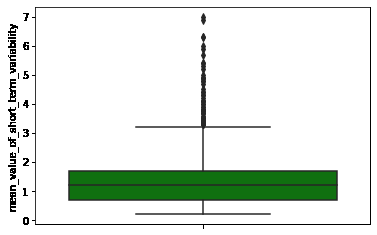
>
> 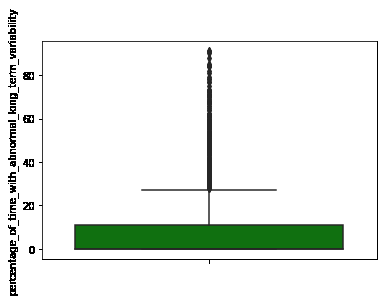
>
> 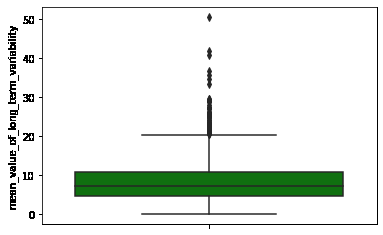
>
> 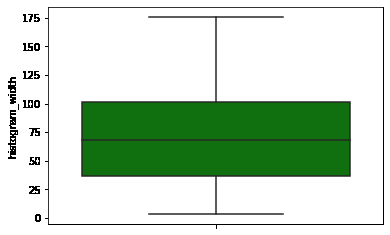
>
> 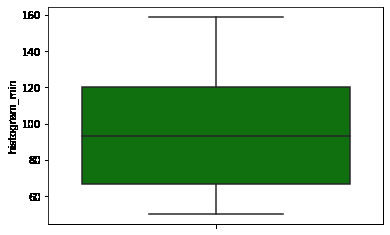
>
> 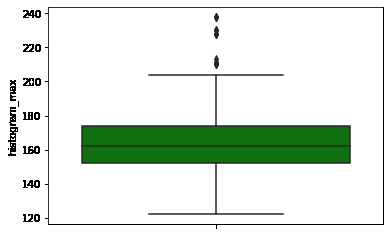
>
> 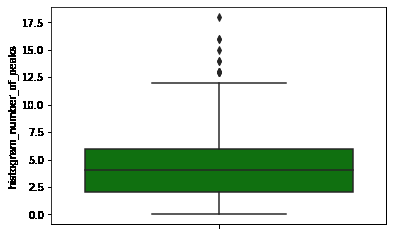
>
> 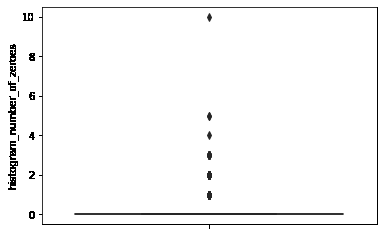
>
> 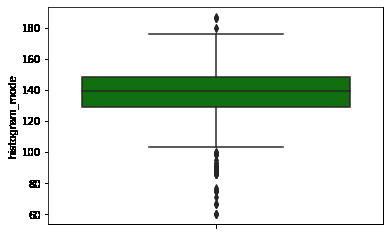
>
> 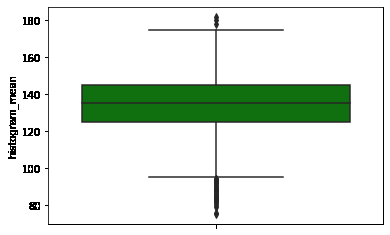
>
> 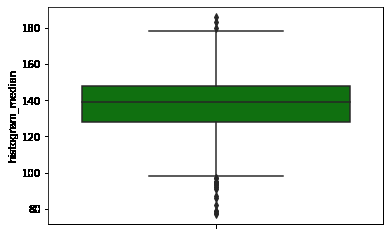
>
> 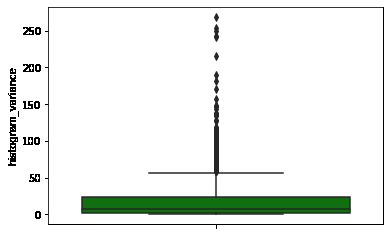
>
> 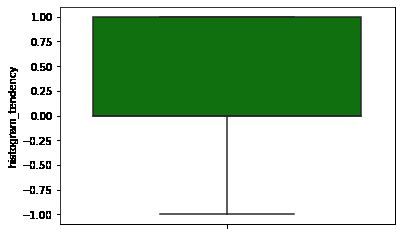
>
> 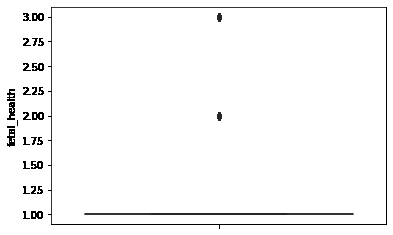
>
> **Removing the outliers**  
> **for** i **in** range(len(nums)):  
> sns.boxplot(df\[nums\[i\]\])  
> plt.title(nums\[i\])  
> plt.title("plot before outlier removing")  
> plt.show()  
> **def** drop_outliers(df, field_name):  
> iqr =1.5\* (np.percentile(df\[field_name\], 75)  
> np.percentile(df\[field_name\], 25))  
> df.drop(df\[df\[field_name\] \> (iqr +  
> np.percentile(df\[field_name\], 75))\].index, inplace=True)  
> df.drop(df\[df\[field_name\] \< (np.percentile(df\[field_name\],
>
> 25)- iqr)\].index, inplace=True)  
> iqr =1.5\* (np.percentile(df\[field_name\], 75)  
> np.percentile(df\[field_name\], 25))  
> df.drop(df\[df\[field_name\] \> (iqr +  
> np.percentile(df\[field_name\], 75))\].index, inplace=True)  
> df.drop(df\[df\[field_name\] \< (np.percentile(df\[field_name\], 25)-
> iqr)\].index, inplace=True)  
> drop_outliers(df, nums\[i\])  
> sns.boxplot(df\[nums\[i\]\])  
> plt.title("plot after outlier removing")  
> plt.show()
>
> 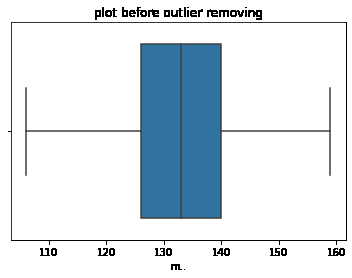
>
> 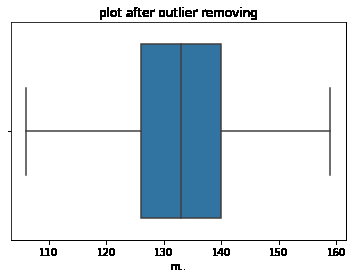
>
> 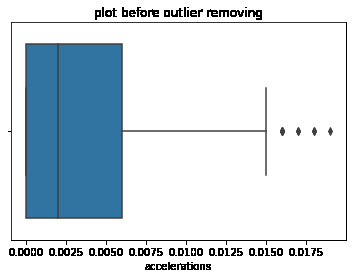
>
> 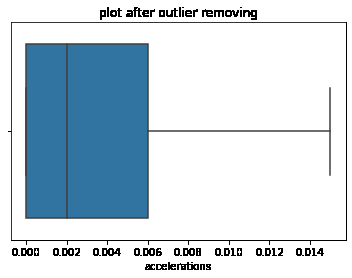
>
> 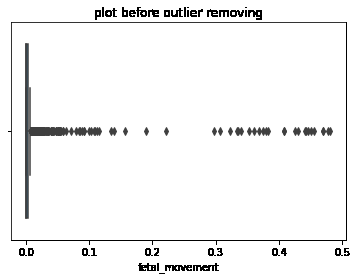
>
> 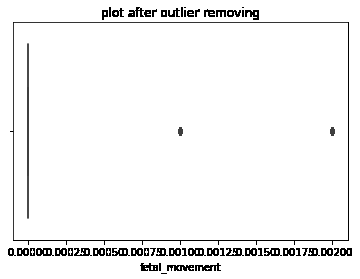
>
> 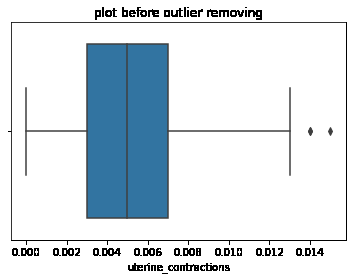
>
> 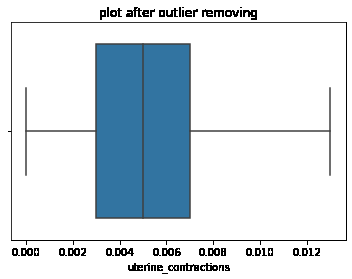
>
> 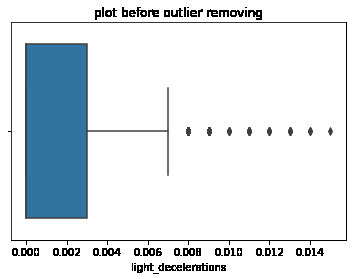
>
> 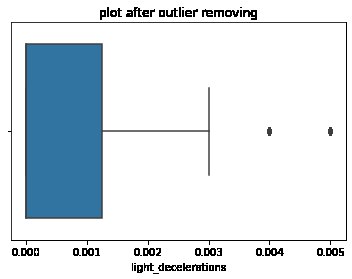
>
> 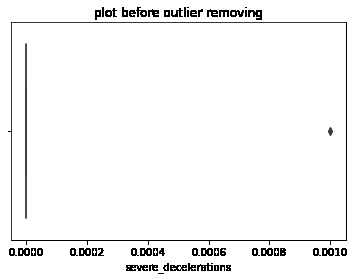
>
> 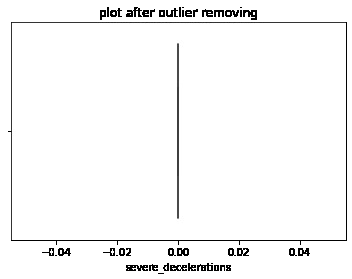
>
> 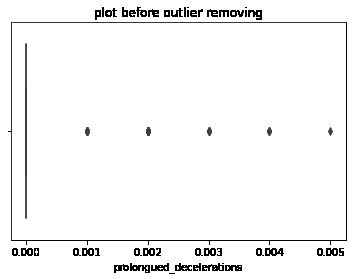
>
> 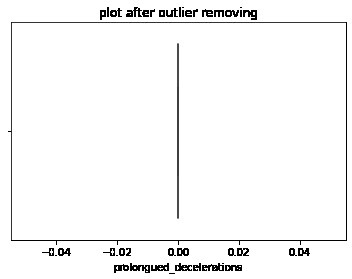
>
> 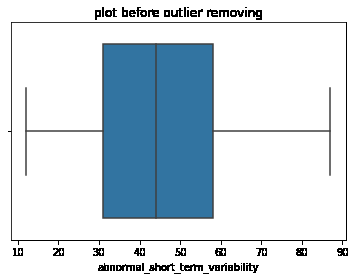
>
> 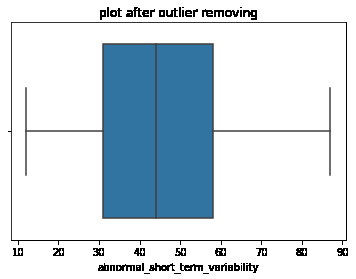
>
> 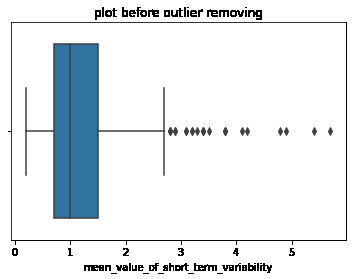
>
> 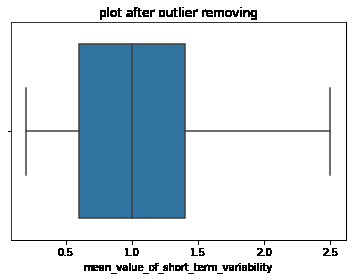
>
> 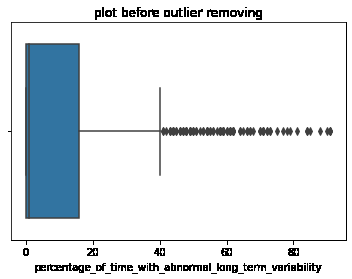
>
> 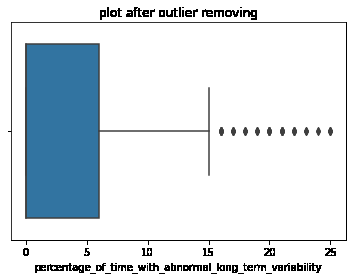
>
> 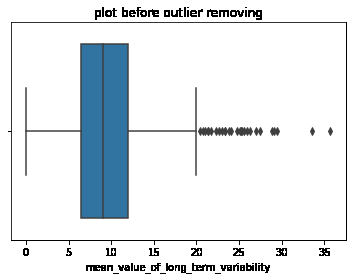
>
> 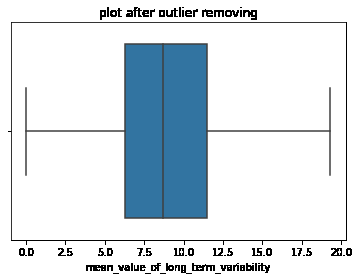
>
> 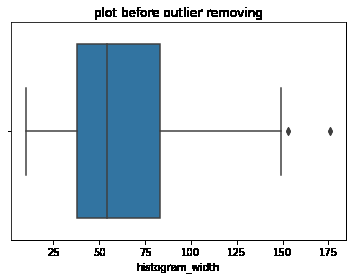
>
> 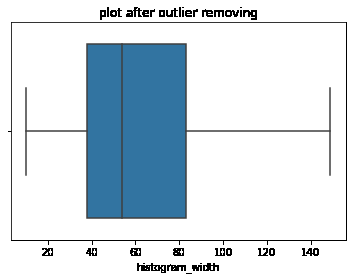
>
> 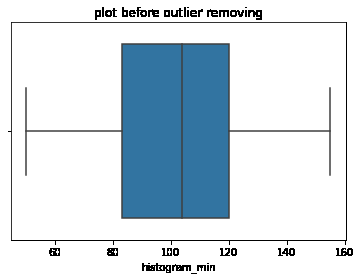
>
> 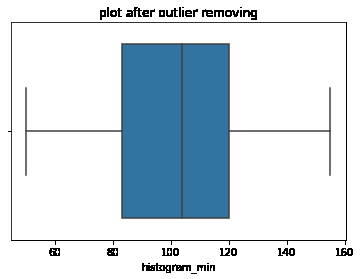
>
> 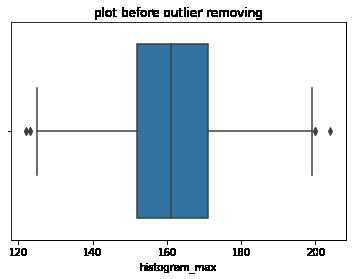
>
> 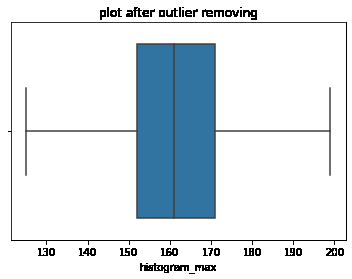
>
> 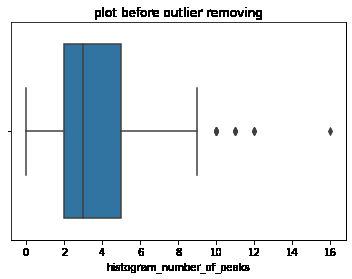
>
> 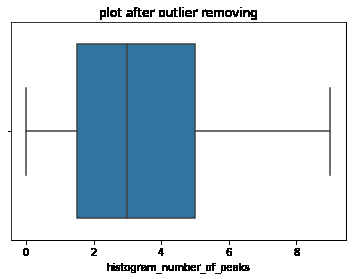
>
> 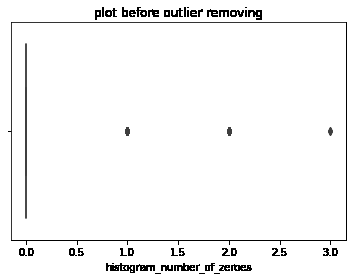
>
> 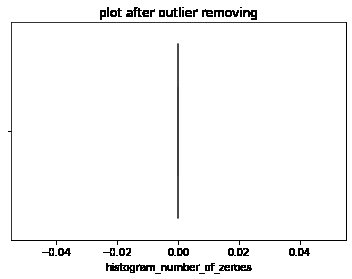
>
> 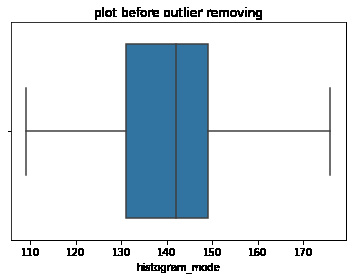
>
> 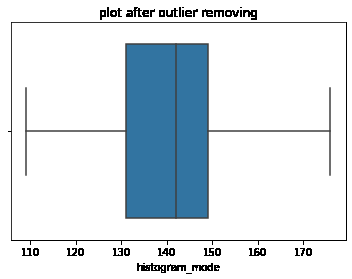
>
> 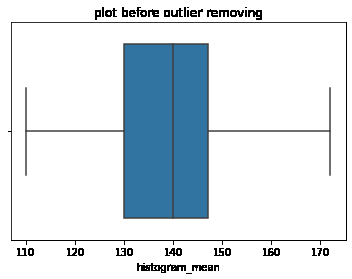
>
> 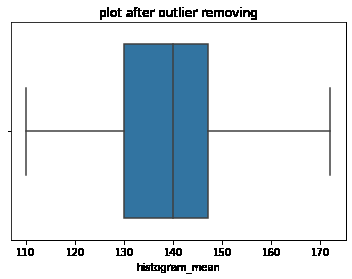
>
> 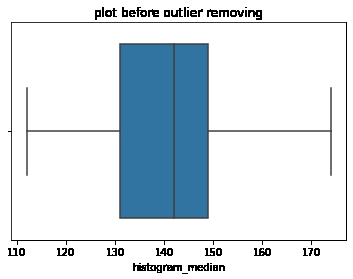
>
> 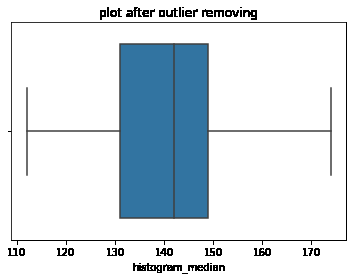
>
> 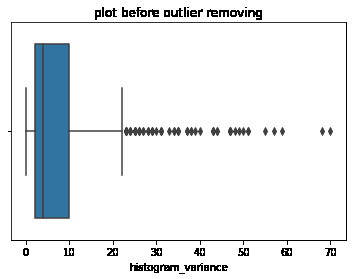
>
> 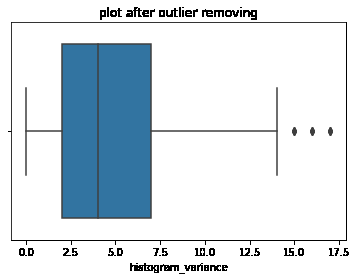
>
> 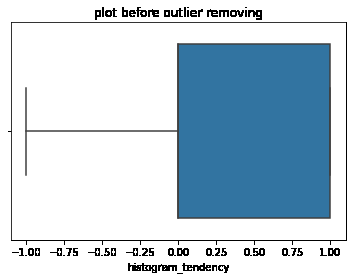
>
> 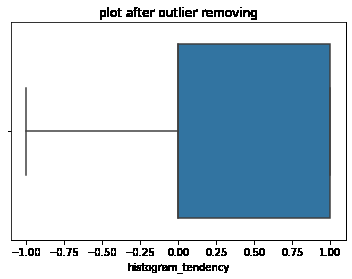
>
> 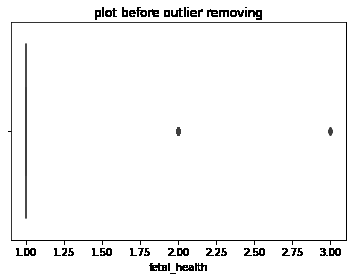
>
> 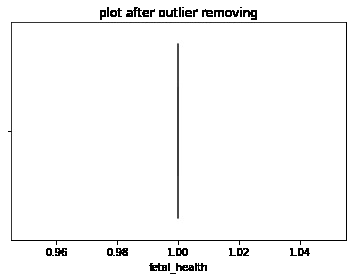
>
> **Feature scaling**  
> from sklearn.preprocessing import StandardScaler SC=StandardScaler()  
> X_train=SC.fit_transform(X_train)  
> X_test=SC.fit_transform(X_test)
>
> print(X_train)
>
> \[\[-1.46513509 -0.83485626 -0.20820521 ... -1.18281773 -0.60623421
> -2.14821249\]  
> \[ 0.16393359 -0.83485626 -0.0746156 ... -0.08025974 -0.53911612
> 1.13129086\]  
> \[-1.2615015 2.2251405 -0.00782079 ... -0.42480911 -0.37132092
> -2.14821249\]  
> ...
>
> \[ 1.28391831 1.71514104 -0.20820521 ... 1.160118 -0.50555708
> -0.50846081\]  
> \[ 1.08028472 -0.83485626 0.6823922 ... 0.74665876 -0.06928955
> 1.13129086\]  
> \[ 0.97846793 -0.3248568 0.94957142 ... 0.74665876 1.00459976
> -0.50846081\]\]
>
> **Building the Model**  
> from sklearn.neighbors import KNeighborsClassifier  
> classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
> classifier.fit(X_train,y_train)
>
> KNeighborsClassifier()
>
> y_pred=classifier.predict(X_test)  
> print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len
> (y_test),1)),1))
>
> \[\[1 1\]  
> \[3 3\]  
> \[1 1\]  
> ...
>
> \[1 1\]  
> \[1 1\]  
> \[2 1\]\]
>
> **Cross validation**  
> parameters ={ 'n_neighbors' : \[5,7,9,11,13,15\],  
> 'weights' : \['uniform','distance'\],  
> 'metric' : \['minkowski','euclidean','manhattan'\]} from
> sklearn.model_selection import RandomizedSearchCV cv =
> RandomizedSearchCV(classifier,parameters ,cv=5)
> cv.fit(X_train,y_train)
>
> RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),  
> param_distributions={'metric': \['minkowski', 'euclidean',  
> 'manhattan'\], 'n_neighbors': \[5, 7, 9, 11, 13, 15\],  
> 'weights': \['uniform', 'distance'\]})
>
> y_pred = cv.predict(X_test)  
> from sklearn.metrics import accuracy_score print('\\n Hyperparametric
> tuned knn  
> accuracy:',accuracy_score(y_pred,y_test))
>
> Hyperparametric tuned knn accuracy: 0.8862745098039215
>
> test_set=pd.read_csv('test.csv')  
> y_pre =classifier.predict(test_set)  
> print(y_pre )
>
> \[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
> 1 1 1  
> 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
> 1 1  
> 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
> 1 1  
> 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
> 1 1  
> 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
> 1 1
>
> 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
> 1 1  
> 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
> 1 1  
> 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
> 1 1  
> 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
> 1 1  
> 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
> 1 1  
> 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
> 1 1  
> 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1\]
>
> **Saving the file in csv format**  
> y = pd.DataFrame(y_pred).astype(int) y.to_csv('Result.csv')